<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


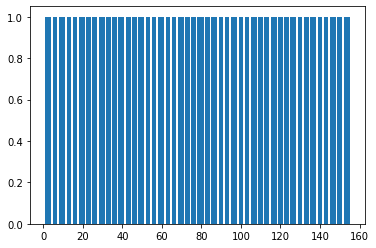

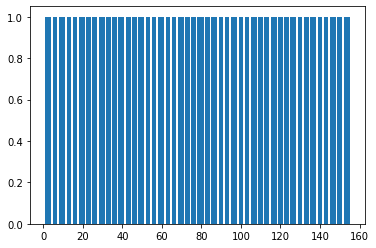

In [4]:
plt.hist(df['Freedom'], 200)
plt.show()
plt.hist(df['Positive affect'], 200)
plt.show()

Это - равномерное распределение, потому что значения - это позиция страны по этому критерию в этой выборке. Соответственно, все значения равномерно представлены в одном экземпляре

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
freedom = df[df.Freedom.notnull()].Freedom

print(f'Медиана: {freedom.median()}')

try:
    print(f'Мода: {statistics.mode(freedom)}')
except statistics.StatisticsError as se:
    print(f'Мода не определена: {se}')

print(f'Стандартное отклонение: {statistics.pstdev(freedom)}')

print(f'Дисперсия: {statistics.pvariance(freedom)}')

print(f'Минимум: {freedom.min()}')

print(f'Максимум: {freedom.max()}')

print(f'Выбросы: {df[df.Freedom.isnull()].Freedom}')

print(f'Размах: {freedom.max() - freedom.min()}')


Медиана: 78.0
Мода не определена: no unique mode; found 155 equally common values
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Минимум: 1.0
Максимум: 155.0
Выбросы: 28   NaN
Name: Freedom, dtype: float64
Размах: 154.0


Почему нельзя найти моду?

Моду нельзя найти потому что нет однозначно выраженного самого частого встречающегося значения

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициэнт Пирсона: 0.6817698430601657


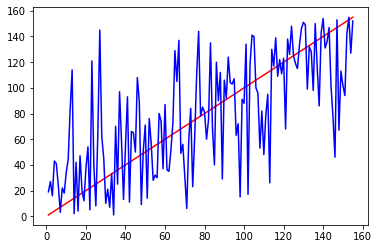

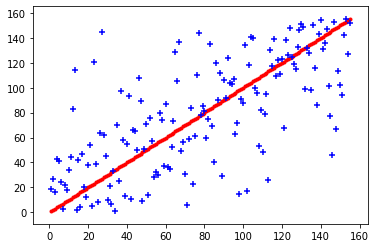

In [6]:
df = df.dropna(subset=['Freedom', 'Positive affect'])

from scipy.stats import pearsonr
print(f'Коэффициэнт Пирсона: {pearsonr(df.Freedom.values, df["Positive affect"].values)[0]}')

sorted_by_freedom = df.sort_values('Freedom')

plt.plot(sorted_by_freedom.Freedom.values, sorted_by_freedom.Freedom.values, color='r') #Freedom
plt.plot(sorted_by_freedom.Freedom.values, sorted_by_freedom['Positive affect'].values, color='b') #Positive affect
plt.show()

plt.scatter(df.Freedom.values, df.Freedom.values, marker='.', color='red')
plt.scatter(df.Freedom.values, df['Positive affect'].values, marker='+', color='blue')



Нормализовать данные колонки Freedom (централизация + масштабирование)

[-1.]
[1.]
0.0


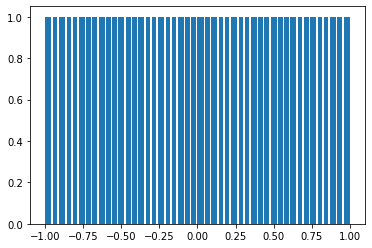

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1.0,1.0))
freedom_normalized = min_max_scaler.fit_transform(np.array(freedom).reshape(-1,1))
print(min(freedom_normalized))
print(max(freedom_normalized))
print(np.round(freedom_normalized.mean(), 10))
plt.hist(freedom_normalized, 200)
plt.show()

Построить матрицу корреляций для всех колонок таблицы

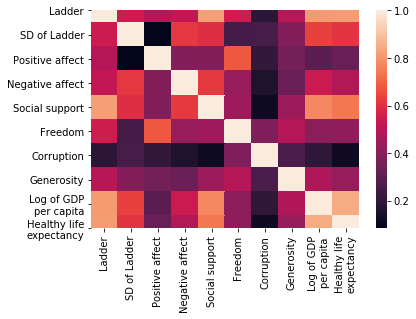

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.542711,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.812084,0.816052
SD of Ladder,0.542711,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.637844,0.613389
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.812084,0.637844,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.849084
Healthy life\nexpectancy,0.816052,0.613389,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.849084,1.000000


In [8]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()
df.corr()

Загрузить таблицу цен на авокадо: 

In [9]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Внизу построена гистограмма, и посчитан проецент записей, выходящих за 2 и за 3 стандартных отклонения.
График выглядит скошенным, а правило трех сигм не выполняется - на хвостах остается 0.7% вместо 0.28%.
Из этого можно сделать вывод, что это распределение не является нормальным. Способа определить, какое именно это распределение - пока не знаю, но похоже на Стьюдента, скошенное какое-то. Думаю потому, что в минус цена уйти не может, а вот в плюс, в теории, не ограничена.

2 sigma = 3.830346868321552%
3 sigma = 0.7178475532905912%


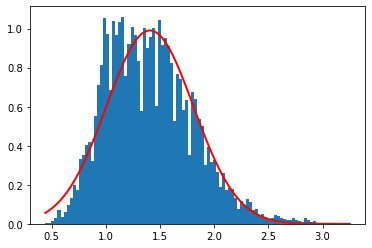

In [10]:
mean = df.AveragePrice.mean()
sigma = statistics.stdev(df.AveragePrice)
sigma2 = df.loc[(df.AveragePrice < (mean - 2*sigma)) | (df.AveragePrice > (mean + 2*sigma))]
print(f'2 sigma = {len(sigma2)*100/len(df)}%')
sigma3 = df.loc[(df.AveragePrice < (mean - 3*sigma)) | (df.AveragePrice > (mean + 3*sigma))]
print(f'3 sigma = {len(sigma3)*100/len(df)}%')

count, bins, ignored = plt.hist(df.AveragePrice, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Для начала изучим корреляцию между 4046 и Average Price.
Для начала посмотрим, как данные велчины выглядат на диаграмме:

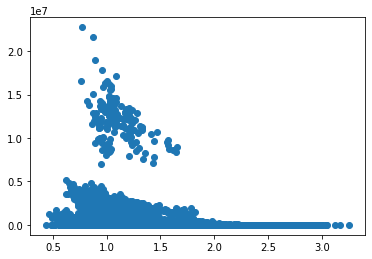

In [11]:
type_name = '4046'
plt.scatter(df.AveragePrice, df[type_name])
plt.show()

Из данной диаграммы явно видно, что распределение для 4046 неравномерное. Кроме того, ранее мы узнали, что и распределение AveragePrice тоже не совсем равномерное. Из этого можно сделать вывод, что значение корреляции Пирсона для данных величин  не имеет смысла.
Но задание требует ее тоже посчитать. Сделаем же это.

In [12]:
from scipy.stats import pearsonr

type_name = '4046'

print(f'Для {type_name}:')
corr, p_value = pearsonr(df.AveragePrice, df[type_name])
print(f'Пирсона: {corr}')
coef, p = sts.spearmanr(df.AveragePrice, df[type_name])
print('Спирмана: %.3f' % coef)
coef, p = sts.kendalltau(df.AveragePrice, df[type_name])
print('Кендала: %.3f' % coef)
print()

type_name = '4225'

print(f'Для {type_name}:')
corr, p_value = pearsonr(df.AveragePrice, df[type_name])
print(f'Пирсона: {corr}')
coef, p = sts.spearmanr(df.AveragePrice, df[type_name])
print('Спирмана: %.3f' % coef)
coef, p = sts.kendalltau(df.AveragePrice, df[type_name])
print('Кендала: %.3f' % coef)
print()
type_name = '4770'

print(f'Для {type_name}:')
corr, p_value = pearsonr(df.AveragePrice, df[type_name])
print(f'Пирсона: {corr}')
coef, p = sts.spearmanr(df.AveragePrice, df[type_name])
print('Спирмана: %.3f' % coef)
coef, p = sts.kendalltau(df.AveragePrice, df[type_name])
print('Кендала: %.3f' % coef)

Для 4046:
Пирсона: -0.20831704848788404
Спирмана: -0.596
Кендала: -0.417

Для 4225:
Пирсона: -0.17292777250933508
Спирмана: -0.514
Кендала: -0.344

Для 4770:
Пирсона: -0.17944598397975575
Спирмана: -0.533
Кендала: -0.375


Глядя на корреляции Спирмана и Кендала, можно сделать вывод,
что обратная зависимость между ценой и количеством проданных авокадо есть, и она довольно существенная.
Чем больше цена, тем меньше авокадо продается.

В качестве бонусного задания немного продолжим исследование.
Из диаграммы видно, что выборка как бы разделена разные группы. И можно пробовать изучить эти группы поотдельности.
Визуально видно, что одну из групп можно отделить по признаку '4046' > 0.6 * 10^7.
Проверим, какое распределение имеет верхнаяя группа:

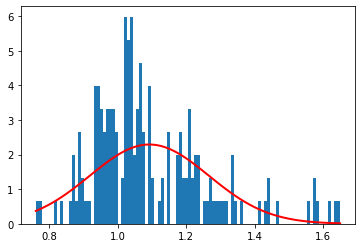

In [13]:
df_1 = df.loc[df['4046'] > (0.6 * 10**7)]

filtred_df = df_1

average_price = filtred_df.AveragePrice
mean = average_price.mean()
sigma = statistics.stdev(average_price)

count, bins, ignored = plt.hist(average_price, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

Распределение тоже явно далеко от нормального.
Но все равно есть ощущение, что всю эту выборку лучше разбить на отдельные группы и попробовать поработать с ними по отдельности.
Разделим всю выборку на несколько групп, и построим для каждой группы линейную регрессию, после чего сравним их.
Поработаем с типом 4770

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


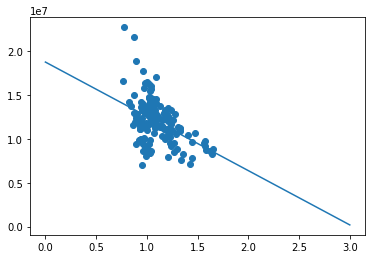

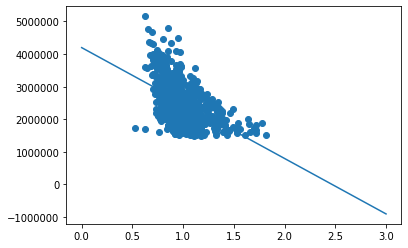

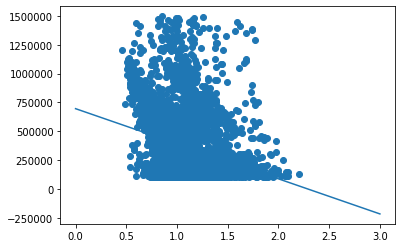

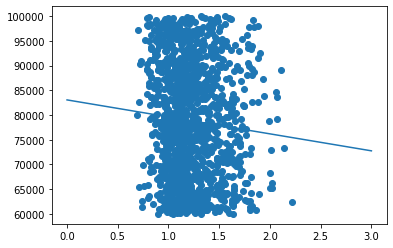

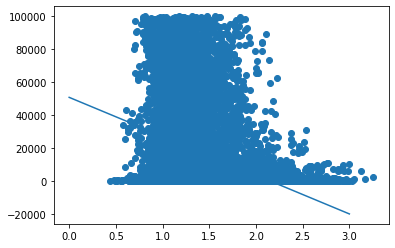

y = [[-6191238.27885276]]x + [18771886.78711406]
y = [[-1700246.62042779]]x + [4198406.62478568]
y = [[-304095.78443527]]x + [696243.78547323]
y = [[-3432.47471438]]x + [83054.10811982]
y = [[-23566.60962457]]x + [50772.2126851]
k/b = [[-0.32981438]]
k/b = [[-0.40497426]]
k/b = [[-0.43676625]]
k/b = [[-0.04132817]]
k/b = [[-0.46416353]]


In [14]:
type_name = '4046'
df_1 = df.loc[df[type_name] > (0.6 * 10**7)]
df_2 = df.loc[df[type_name] < (0.6 * 10**7)][df[type_name] > (1.5 * 10**6)]
df_3 = df.loc[df[type_name] < (1.5 * 10**6)][df[type_name] > (10**5)]
df_4 = df.loc[df[type_name] < (10**5)][df[type_name] > (0.6 * 10**5)]
df_5 = df.loc[df[type_name] < (10**5)]

      
from sklearn.linear_model import LinearRegression
                
groups = [df_1, df_2, df_3, df_4, df_5]
coefs = []

for group in groups:
    filtred_df = group
    model = LinearRegression()
    model.fit(filtred_df.AveragePrice.values.reshape(-1, 1), filtred_df[type_name].values.reshape(-1, 1))
    x = [0, 3]
    y = model.coef_*x + model.intercept_
    y = np.transpose(y)
    coefs.append((model.coef_, model.intercept_))
    plt.scatter(filtred_df.AveragePrice, filtred_df[type_name])
    plt.plot(x, y)
    plt.show()
                
for coef in coefs:
    print(f'y = {coef[0]}x + {coef[1]}')
for coef in coefs:
    print(f'k/b = {coef[0]/coef[1]}')

Линии регрессии, построенные для разных групп, имеют наклон в одну сторону. 
На мой взгляд, это достаточно точно говорит нам о том, что корреляция есть, и она довольно значительная. 

Коэффициенты линейной регрессии на порядки отличаются друг от друга, но соотношение между k и b отличается не сильно. Интересно, насколько эти линии близки друг к другу? Построим ка их все на одном графике.

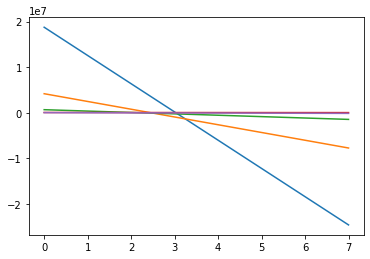

In [15]:
for coef in coefs:
    x = [0, 7]
    y = coef[0]*x + coef[1]
    y = np.transpose(y)
    plt.plot(x, y)
plt.show()

Мда...
Ну а теперь, посчитаем корреляции внутри каждой группы

In [16]:
i = 0
for group in groups:
    i += 1
    print(f'Для группы {i}:')
    corr, p_value = pearsonr(group.AveragePrice, group[type_name])
    print(f'Пирсона: {corr}')
    coef, p = sts.spearmanr(group.AveragePrice, group[type_name])
    print('Спирмана: %.3f' % coef)
    coef, p = sts.kendalltau(group.AveragePrice, group[type_name])
    print('Кендала: %.3f' % coef)
    print()

Для группы 1:
Пирсона: -0.4364029900371942
Спирмана: -0.303
Кендала: -0.230

Для группы 2:
Пирсона: -0.52026695379151
Спирмана: -0.520
Кендала: -0.366

Для группы 3:
Пирсона: -0.2825792243403626
Спирмана: -0.276
Кендала: -0.189

Для группы 4:
Пирсона: -0.07674158772863687
Спирмана: -0.077
Кендала: -0.051

Для группы 5:
Пирсона: -0.36578832293332797
Спирмана: -0.411
Кендала: -0.277



В общем, на самом деле можно сделать вывод, что лучше не пробовать предсказывать продажи авокадо по их средней цене.
По крайней мере с помощью линейной регрессии. Коэффициенты корреляции местами достаточно низкие.